Лабораторна 6 Сеньків Маркіян ТР-31

Вимоги до завдання 1:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Завантаження даних
columns = ["TimesPregnant", "PlasmaGlucose", "DiastolicBP", "TricepsThickness", "SerumInsulin", "BMI", "DiabetesPedigree", "Age", "Class"]
df = pd.read_csv('pima-indians-diabetes.data.csv', names = columns)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(df, test_size=0.30, random_state=42)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\3824490905.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.iloc[:, :-1])
test_scaled = scaler.transform(test_data.iloc[:, :-1])

# Отримані нормалізовані тренувальні та тестові вибірки
X_train = pd.DataFrame(train_scaled, columns=train_data.columns[:-1])
X_test = pd.DataFrame(test_scaled, columns=test_data.columns[:-1])
y_train = train_data.iloc[:, -1]
y_test = test_data.iloc[:, -1]

In [3]:
# Створення моделі логістичної регресії
model = LogisticRegression()

# Тренування моделі
model.fit(X_train, y_train)

# Оцінка моделі
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Точність моделі: {accuracy:.2f}")

Точність моделі: 0.74


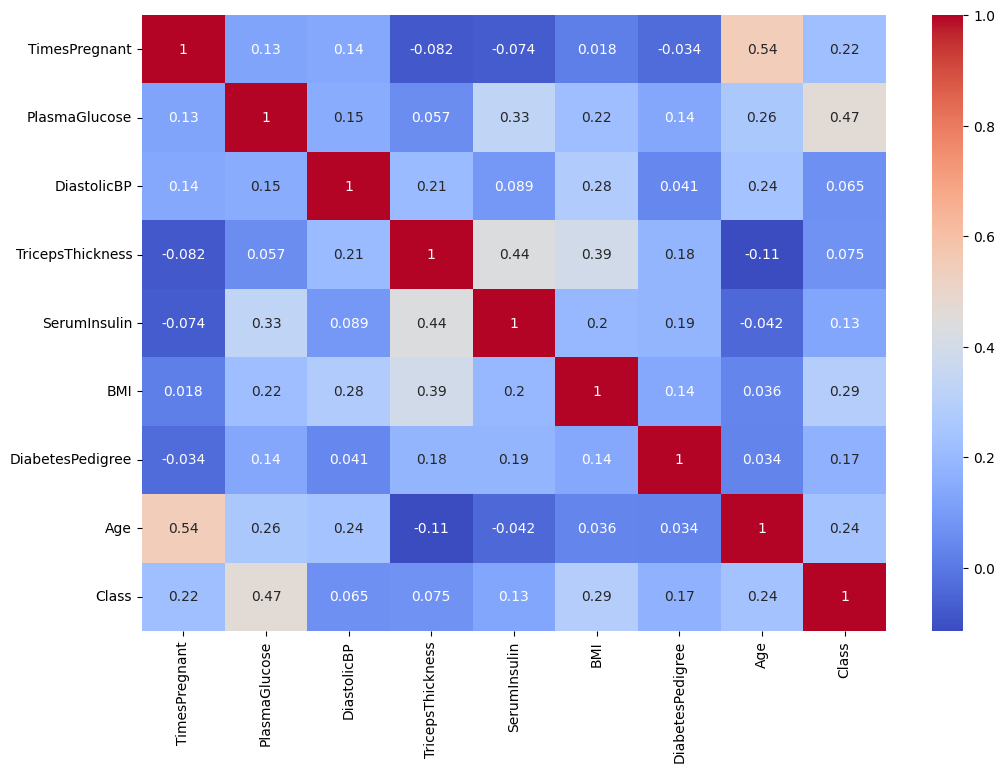

In [4]:
# Кореляційна матриця
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [10]:
# Вибір ознак 4, 5, 6, 7 колонок 
# вказуємо назви цих колонок
selected_features = ["TricepsThickness", "SerumInsulin", "BMI", "DiabetesPedigree",]

# Повторне тренування з обмеженням до вибраних ознак
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
selected_predictions = model.predict(X_test_selected)
selected_accuracy = accuracy_score(y_test, selected_predictions)
print(f"Точність моделі з обраними ознаками: {selected_accuracy:.2f}")


Точність моделі з обраними ознаками: 0.68


Вимоги до завдання 2:

In [6]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

columna = ["Time", "X", "Y", "Z"]
dfFootAccelerometer = pd.read_csv('foot-accelerometer.data.csv', names = columna)
dfFootGyroscope = pd.read_csv('foot-gyroscope.data.csv', names = columna)
dfRunAccelerometer = pd.read_csv('run-accelerometer.data.csv', names = columna)
dfRunGyroscope = pd.read_csv('run-gyroscope.data.csv', names = columna)
dfStairsAccelerometer = pd.read_csv('stairs-accelerometer.data.csv', names = columna)
dfStairsGyroscope = pd.read_csv('stairs-gyroscope.data.csv', names = columna)

# додаємо ознаку до кожного датасету
dfFootAccelerometer["Active"] = 0
dfFootGyroscope["Active"] = 0
dfRunAccelerometer["Active"] = 1
dfRunGyroscope["Active"] = 1
dfStairsAccelerometer["Active"] = 2
dfStairsGyroscope["Active"] = 2

# об'єднання датасетів
dfAccelerometer = pd.concat([dfFootAccelerometer, dfRunAccelerometer, dfStairsAccelerometer], ignore_index=True)
dfGyroscope = pd.concat([dfFootGyroscope, dfRunGyroscope, dfStairsGyroscope], ignore_index=True)

'\ntrain_FootAccelerometer, test_FootAccelerometer = train_test_split(dfFootAccelerometer, test_size=0.30, random_state=42)\ntrain_FootGyroscope, test_FootGyroscope = train_test_split(dfFootGyroscope, test_size=0.30, random_state=42)\ntrain_RunAccelerometer, test_RunAccelerometer = train_test_split(dfRunAccelerometer, test_size=0.30, random_state=42)\ntrain_RunGyroscope, test_RunGyroscope = train_test_split(dfRunGyroscope, test_size=0.30, random_state=42)\ntrain_StairsAccelerometer, test_StairsAccelerometer = train_test_split(dfStairsAccelerometer, test_size=0.30, random_state=42)\ntrain_StairsGyroscope, test_StairsGyroscope = train_test_split(dfStairsGyroscope, test_size=0.30, random_state=42)'

In [7]:
# Робота з даними для акселерометр
def workWithData(data, name):
    print(f"{name}:")
# Розбиття даних на тренувальну і валідаційну вибірки
    train_data, test_data = train_test_split(data, test_size=0.30, random_state=42)


    # Розділяємо дані на ознаки та мітки
    X = data[['Time', 'X', 'Y', 'Z']]  # виключаємо Active для ознак
    y = data['Active']  # це мітка  
    #print(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    print("Точність SVM моделі: ", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Кореляційна матриця
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(name)
    plt.show()

Accelerometer:
Точність SVM моделі:  0.6242624498465895
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.70      0.57      1404
           1       0.97      0.58      0.73      1505
           2       0.59      0.59      0.59      1328

    accuracy                           0.62      4237
   macro avg       0.68      0.62      0.63      4237
weighted avg       0.69      0.62      0.64      4237



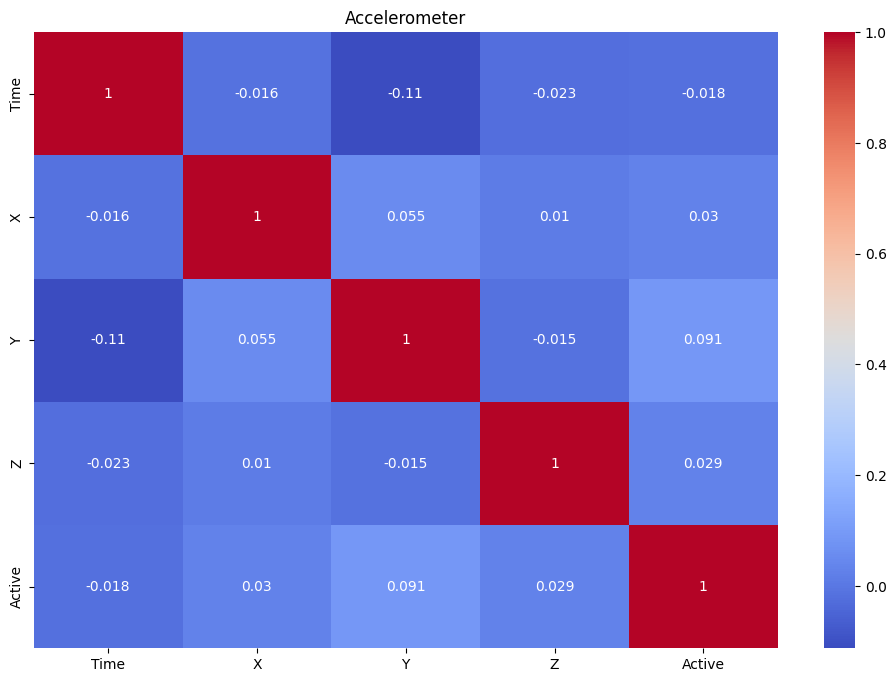

In [8]:
# Робота з даними для акселерометра
workWithData(dfAccelerometer, "Accelerometer")


Gyroscope:
Точність SVM моделі:  0.4354392682407998
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.51      0.44      1585
           1       0.77      0.37      0.50      1590
           2       0.35      0.43      0.39      1526

    accuracy                           0.44      4701
   macro avg       0.50      0.44      0.44      4701
weighted avg       0.51      0.44      0.44      4701



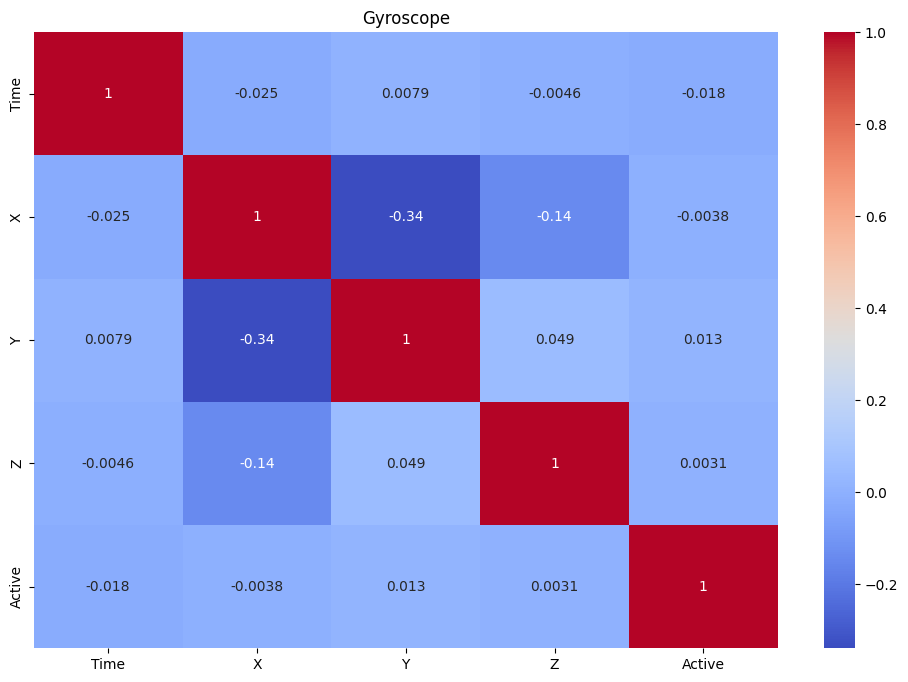

In [9]:
# Робота з даними для Гіроскопа
workWithData(dfGyroscope, "Gyroscope")